<a href="https://colab.research.google.com/github/kocakcan/ml_foundations/blob/main/Ch3_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyze Customer Feedback

In this exercise, we analyze customer feedback using spaCy and TextBlob.

#Exercise #1:  Install Libraries and Modules



In [10]:
#Install Libraries and Modules
import csv
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

#Exercise #2: Read in Feedback File and Create Output File for Results

In [18]:
# EXERCISE - SCROLL DOWN TO THE "START HERE" SECTION BELOW.

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

#Define the path to the file containing feedback
file_path = '/content/feedback_data.csv'

# Read the file using open() with the specified parameters
with open(file_path, "r", encoding="utf-8") as file:
    # Step 2: Read the lines of the file
    feedback_data = file.readlines()

# Add code to output feedback results to a file.
output_csv_path = "feedback_analysis_results.csv"

# Prepare CSV header
csv_header = ["Feedback Index", "Sentiment Polarity", "Sentiment Subjectivity", "Named Entities", "Preferred Contact Method"]

# Open CSV file for writing
with open(output_csv_path, "w", newline="", encoding="utf-8") as csv_file:
    # Create CSV writer
    csv_writer = csv.writer(csv_file)

    # Write the header
    csv_writer.writerow(csv_header)

    #-----------------------------------------------------------------
    # START HERE

    # Process and analyze each feedback
    for idx, narrative in enumerate(feedback_data, start=1):
        print(f"\nProcessing Feedback {idx}:")
        print(narrative.split())

        # Process the narrative using spaCy
        # token_lists.append([token.text for token in doc])
        doc = nlp(narrative)
        # Perform sentiment analysis using TextBlob
        # sentiment_polarity.append(TextBlob(feedback).sentiment.polarity)
        # sentiment_subjectivity.append(TextBlob(feedback).sentiment.subjectivity)
        blob = TextBlob(narrative)
        sentiment_polarity = blob.sentiment.polarity
        sentiment_subjectivity = blob.sentiment.subjectivity
        print(f"Sentiment: {sentiment_polarity} (Polarity), {sentiment_subjectivity} (Subjectivity)")

        # Extract named entities
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        print("Named Entities:", entities)

        # Determine the preferred contact method
        preferred_contact_method = "chat" if "email" not in narrative.lower() else "email"
        print(f"Preferred Contact Method: {preferred_contact_method}")

        # Write the results to the CSV file
        csv_writer.writerow([idx, sentiment_polarity, sentiment_subjectivity, entities, preferred_contact_method])
    #-----------------------------------------------------------------



Processing Feedback 1:
['Your', 'products', 'are', 'excellent.', 'I', 'really', 'love', 'the', 'quality!', 'However,', 'delivery', 'to', 'my', 'location', 'in', 'Los', 'Angeles', 'was', 'a', 'bit', 'slow.', 'abbey@email.com']
Sentiment: 0.44166666666666665 (Polarity), 0.6666666666666666 (Subjectivity)
Named Entities: [('Los Angeles', 'GPE')]
Preferred Contact Method: email

Processing Feedback 2:
['The', 'customer', 'service', 'team', 'in', 'New', 'York', 'was', 'helpful', 'in', 'resolving', 'my', 'issue.', 'I', 'appreciate', 'the', 'assistance.', 'brian@email.com']
Sentiment: 0.13636363636363635 (Polarity), 0.45454545454545453 (Subjectivity)
Named Entities: [('New York', 'GPE')]
Preferred Contact Method: email

Processing Feedback 3:
['The', 'new', 'features', 'in', 'the', 'latest', 'release', 'are', 'fantastic!', 'They', 'have', 'greatly', 'improved', 'the', 'user', 'experience', 'in', 'San', 'Francisco.']
Sentiment: 0.48409090909090907 (Polarity), 0.7511363636363636 (Subjectivity)


#Exercise #3:  Exploratory Data Analysis on Customer Feedback

In [19]:
##Load results file into a Pandas Dataframe
df = pd.read_csv("feedback_analysis_results.csv")

# Display the first rows of the DataFrame
df.head()

,Feedback Index,Sentiment Polarity,Sentiment Subjectivity,Named Entities,Preferred Contact Method
0,1,0.441667,0.666667,"[('Los Angeles', 'GPE')]",email
1,2,0.136364,0.454545,"[('New York', 'GPE')]",email
2,3,0.484091,0.751136,"[('San Francisco', 'GPE')]",chat
3,4,-0.750000,0.750000,"[('Chicago', 'GPE')]",email


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Feedback Index            4 non-null      int64  
 1   Sentiment Polarity        4 non-null      float64
 2   Sentiment Subjectivity    4 non-null      float64
 3   Named Entities            4 non-null      object 
 4   Preferred Contact Method  4 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 292.0+ bytes


##Plot the Preferred Contact Method

/tmp/ipython-input-3587671241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Preferred Contact Method", palette="muted")


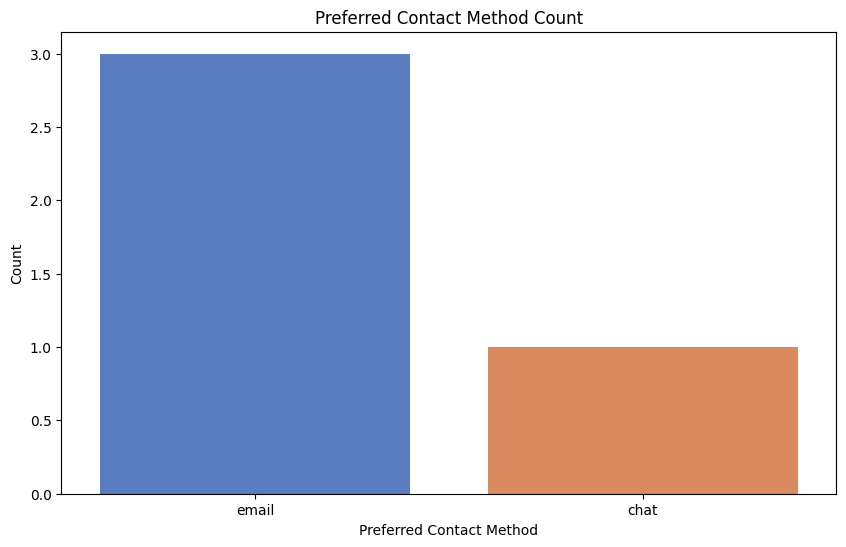

In [25]:
# Example plot: Preferred Contact Method Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Preferred Contact Method", palette="muted")
plt.title("Preferred Contact Method Count")
plt.xlabel("Preferred Contact Method")
plt.ylabel("Count")
plt.show()

##Plot the Sentiment Polarity and Sentiment Subjectivity

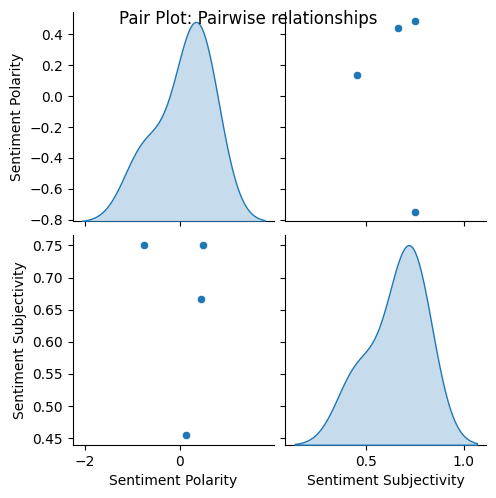

In [26]:
# Pair Plot: Pairwise relationships
sns.pairplot(data=df[['Sentiment Polarity', 'Sentiment Subjectivity']],
             diag_kind='kde')
plt.suptitle('Pair Plot: Pairwise relationships')
plt.show()